

<div align="center">


<h1 style="color:#7b2cbf"> ✨ TP1: Implémentation de la logique floue avec scikit-fuzzy ✨ </h1>

</div>

</br>
</br>


<div style="text-align: center;">
  <strong>Encadré par:</strong> Pr. LAMGHARI NIDAL  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <strong>Fait par:</strong> NAJI EZ ZOUBIR
</div>
</br>
</br>
</br>

<h3 style="color:#219ebc;"> Partie 1 : Introduction théorique et installation </h3> 



<p style="text-align: justify;">
Dans cette partie, il s'agit de se familiariser avec la bibliothèque scikit-fuzzy, dédiée à la gestion de systèmes flous en Python.L'installation de scikit-fuzzy est réalisée via la commande pip install scikit-fuzzy. Une fois installée, la bibliothèque est testée en créant une variable floue pour la température, avec des états linguistiques tels que "Froid", "Moyen" et "Chaud". Cette étape permet de visualiser les fonctions d'appartenance et de comprendre les concepts de base de la logique floue.
</p>


In [1]:
# Question 1.1 : Installation de la bibliothèque
# pip install scikit-fuzzy

In [2]:
%pip install scikit-fuzzy

Note: you may need to restart the kernel to use updated packages.


    extract-msg (<=0.29.*)
                 ~~~~~~~^


In [3]:
# Question 1.2 : Import des bibliothèques nécessaires
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

C:\Users\naji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


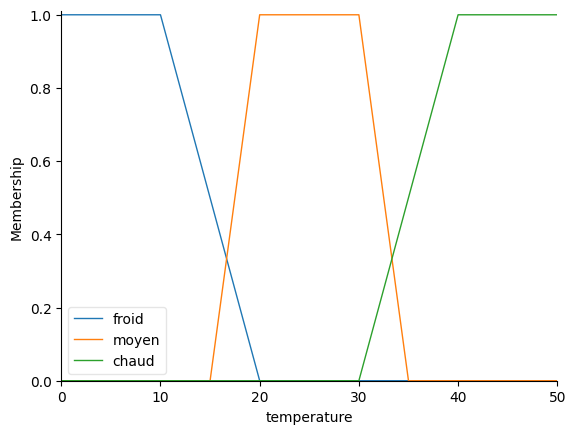

In [4]:
# Question 1.3 : Création de la variable floue Température
# Création de l'univers de discours pour la température (de 0 à 50 degrés)
temperature = ctrl.Antecedent(np.arange(0, 51, 1), 'temperature')

# Définition des fonctions d'appartenance pour la température
temperature['froid'] = fuzz.trapmf(temperature.universe, [0, 0, 10, 20])
temperature['moyen'] = fuzz.trapmf(temperature.universe, [15, 20, 30, 35])
temperature['chaud'] = fuzz.trapmf(temperature.universe, [30, 40, 50, 50])

# Visualisation des fonctions d'appartenance de la température
temperature.view()

<h3 style="color:#219ebc;">  Partie 2 : Système de contrôle de chauffage</h3>


<p style="text-align: justify;">
Cette section implique la création d'un système flou qui ajuste la puissance d'un chauffage en fonction de la température ambiante. Les fonctions d'appartenance sont définies pour des niveaux de chauffage (Faible, Moyenne, Forte) basées sur des conditions de température. Des règles floues sont implémentées pour moduler la puissance de chauffage, par exemple, augmenter la puissance pour "Froid" et la diminuer pour "Chaud". La simulation est effectuée pour déterminer la puissance du chauffage à une température donnée.
</p>

Pour une température de 25°C:
Puissance du chauffage recommandée: 50.00%


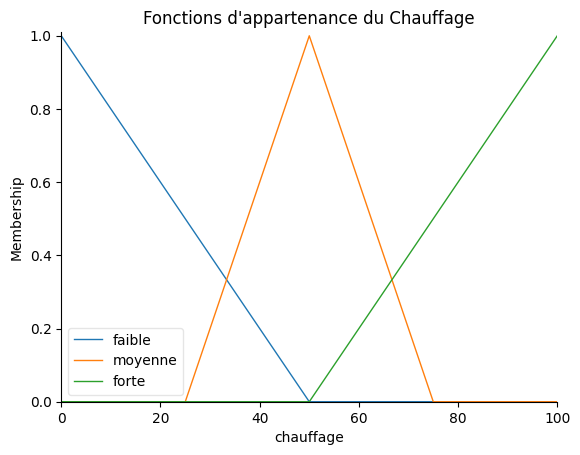

In [5]:
# Question 2.1 : Création de la variable floue Chauffage
# Création de l'univers de discours pour le chauffage (de 0 à 100%)
chauffage = ctrl.Consequent(np.arange(0, 101, 1), 'chauffage')

# Question 2.2 : Ajout des fonctions d'appartenance pour le chauffage
chauffage['faible'] = fuzz.trimf(chauffage.universe, [0, 0, 50])
chauffage['moyenne'] = fuzz.trimf(chauffage.universe, [25, 50, 75])
chauffage['forte'] = fuzz.trimf(chauffage.universe, [50, 100, 100])

# Visualisation des fonctions d'appartenance du chauffage
chauffage.view()
plt.title('Fonctions d\'appartenance du Chauffage')

# Question 2.3 : Implémentation des règles floues
# Définition des règles de contrôle
regle1 = ctrl.Rule(temperature['froid'], chauffage['forte'])
regle2 = ctrl.Rule(temperature['moyen'], chauffage['moyenne'])
regle3 = ctrl.Rule(temperature['chaud'], chauffage['faible'])

# Création du système de contrôle
systeme_chauffage = ctrl.ControlSystem([regle1, regle2, regle3])
simulation = ctrl.ControlSystemSimulation(systeme_chauffage)

# Test du système avec une température de 25°C
simulation.input['temperature'] = 25
simulation.compute()
print(f"Pour une température de 25°C:")
print(f"Puissance du chauffage recommandée: {simulation.output['chauffage']:.2f}%")

<h3 style="color:#219ebc;">  Partie 3 : Système de contrôle de vitesse </h3>

<p style="text-align: justify;">
cette partie porte sur la conception d'un système de gestion de la vitesse d'un véhicule, influencé par la distance de l'obstacle et la visibilité. Les utilisateurs définissent des règles floues pour ajuster la vitesse en fonction de critères d'entrée complexes, comme rendre la vitesse plus prudente en cas de faible visibilité. Cette partie met en lumière l'adaptabilité de la logique floue dans des scénarios de prise de décision en temps réel, en modifiant les seuils pour des ajustements sensibles aux variations d'entrée.
</p>


Résultats des tests de différents scénarios:

Scénario: Distance loin, bonne visibilité
Distance: 80m
Visibilité: 90%
Vitesse recommandée: 115.1 km/h

Scénario: Distance proche, bonne visibilité
Distance: 20m
Visibilité: 80%
Vitesse recommandée: 16.9 km/h

Scénario: Distance moyenne, faible visibilité
Distance: 50m
Visibilité: 30%
Vitesse recommandée: 50.0 km/h

Scénario: Distance très proche, très faible visibilité
Distance: 10m
Visibilité: 10%
Vitesse recommandée: 14.4 km/h


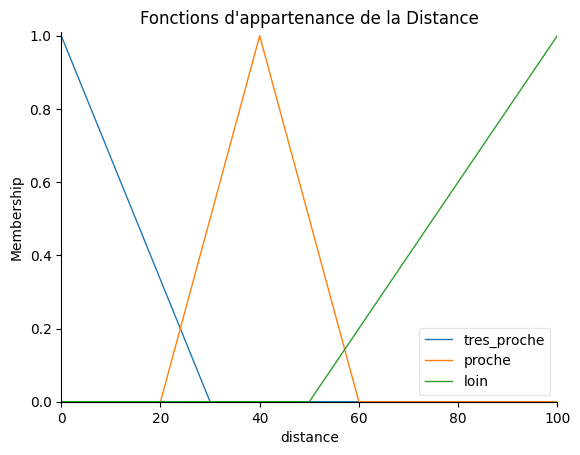

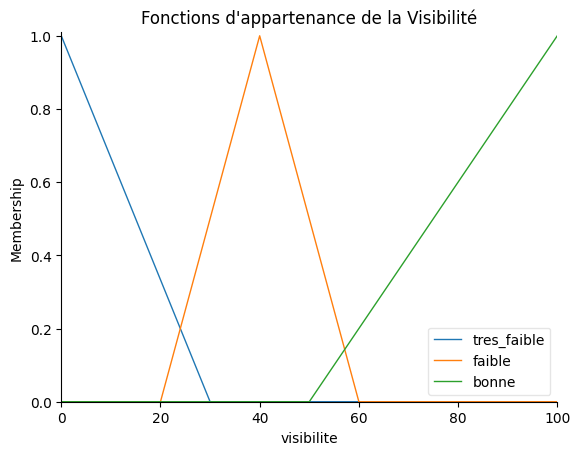

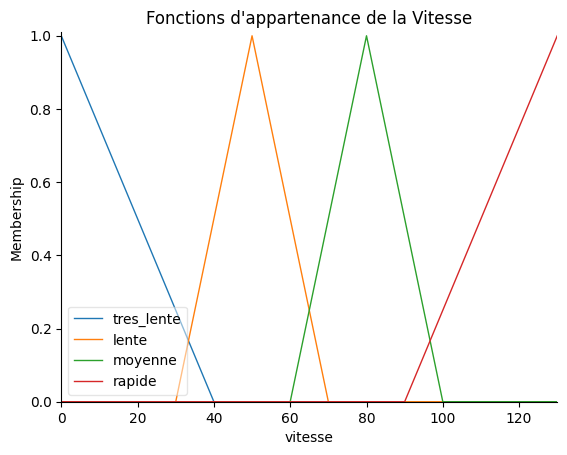

In [6]:
# Question 3.1 : Création des variables d'entrée et de sortie
# Création des univers de discours
distance = ctrl.Antecedent(np.arange(0, 101, 1), 'distance')
visibilite = ctrl.Antecedent(np.arange(0, 101, 1), 'visibilite')
vitesse = ctrl.Consequent(np.arange(0, 131, 1), 'vitesse')

# Question 3.2 : Définition des fonctions d'appartenance
# Pour la distance
distance['tres_proche'] = fuzz.trimf(distance.universe, [0, 0, 30])
distance['proche'] = fuzz.trimf(distance.universe, [20, 40, 60])
distance['loin'] = fuzz.trimf(distance.universe, [50, 100, 100])

# Pour la visibilité
visibilite['tres_faible'] = fuzz.trimf(visibilite.universe, [0, 0, 30])
visibilite['faible'] = fuzz.trimf(visibilite.universe, [20, 40, 60])
visibilite['bonne'] = fuzz.trimf(visibilite.universe, [50, 100, 100])

# Pour la vitesse
vitesse['tres_lente'] = fuzz.trimf(vitesse.universe, [0, 0, 40])
vitesse['lente'] = fuzz.trimf(vitesse.universe, [30, 50, 70])
vitesse['moyenne'] = fuzz.trimf(vitesse.universe, [60, 80, 100])
vitesse['rapide'] = fuzz.trimf(vitesse.universe, [90, 130, 130])

# Question 3.3 : Établissement des règles floues de base
regles_base = [
    ctrl.Rule(distance['tres_proche'], vitesse['tres_lente']),
    ctrl.Rule(distance['proche'] & visibilite['bonne'], vitesse['lente']),
    ctrl.Rule(distance['loin'] & visibilite['bonne'], vitesse['rapide'])
]

# Question 3.6 : Ajout d'une règle pour distance moyenne et 
# faible visibilité
regle_prudence = ctrl.Rule(
    distance['proche'] & visibilite['faible'], 
    vitesse['lente']
)

# Question 3.7 : Ajout d'une règle de sécurité pour très faible visibilité
regle_securite = ctrl.Rule(
    visibilite['tres_faible'], 
    vitesse['tres_lente']
)

# Compilation de toutes les règles
toutes_regles = regles_base + [regle_prudence, regle_securite]

# Création du système de contrôle
systeme_vitesse = ctrl.ControlSystem(toutes_regles)
simulation_vitesse = ctrl.ControlSystemSimulation(systeme_vitesse)

# Question 3.4 et 3.8 : Fonction pour tester différents scénarios
def tester_scenario(dist, visi):
    """
    Test le système avec différentes valeurs de distance et visibilité
    """
    simulation_vitesse.input['distance'] = dist
    simulation_vitesse.input['visibilite'] = visi
    simulation_vitesse.compute()
    return simulation_vitesse.output['vitesse']

# Test de différents scénarios
print("\nRésultats des tests de différents scénarios:")
scenarios = [
    (80, 90, "Distance loin, bonne visibilité"),
    (20, 80, "Distance proche, bonne visibilité"),
    (50, 30, "Distance moyenne, faible visibilité"),
    (10, 10, "Distance très proche, très faible visibilité")
]

for dist, visi, description in scenarios:
    vitesse_recommandee = tester_scenario(dist, visi)
    print(f"\nScénario: {description}")
    print(f"Distance: {dist}m")
    print(f"Visibilité: {visi}%")
    print(f"Vitesse recommandée: {vitesse_recommandee:.1f} km/h")

# Visualisation des variables
distance.view()
plt.title('Fonctions d\'appartenance de la Distance')

visibilite.view()
plt.title('Fonctions d\'appartenance de la Visibilité')

vitesse.view()
plt.title('Fonctions d\'appartenance de la Vitesse')

plt.show()

</br>

<div align="center">

# ✨ Merci ✨

</div>